### Задача проекта

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Необходимо найти параметры, влияющие на целевую перменную - SCORE.

### Предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
import numpy as np

#Загрузка датасета

df = pd.read_csv('stud_math.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Анализ целевой переменной SCORE

Процент пропусков составляет 0.02


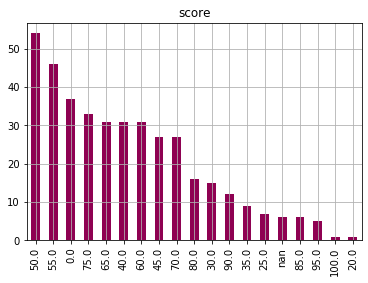

In [2]:
df['score'].value_counts(dropna = False).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'PiYG', 
                              title = 'score')
                
df.score.describe()

omission = len(df[df['score'].isnull()])/len(df['score'])
print('Процент пропусков составляет', round(omission,2))        


Переменная распределена без аномалий. На основании имеющихся данных можно предположить, что шкала оценки принимает значения от 0 до 100 баллов с шагом в 5 баллов. Пропуски составляют около 2%, что не будет значительно влиять на финальный результат. 

Удаляем пропуски в целевой переменной из всего датасета и проверяем удаление.

In [3]:
df.dropna(subset=['score'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

Теперь можно приступать к анализу остальных переменных. Мы можем предположить, что вместе с пропусками в столбце SCORE были удалены пропуски в других столбцах, поэтому общее количество пропусков сократилось.

### Переименование столбцов

Название одного из столбцов содержит запятую, что будет неудобно для дальнейшей работы. Переименуем этот столбец.

In [4]:
df = df.rename(columns = {'studytime, granular': 'studytime_granular'})

### Просмотр процента пропусков в столбцах

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 12.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime_granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 2.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 0.0%


### Заполнение пропусков в нечисловых признаках

Мы видим, что в целом процент пропусков в датасете невелик и не превышает 12%. Поэтому в категориальных, бинарных и ординальных признаках мы можем применить метод заполнения наиболее часто встречающимся значением.

#### Функция для заполнения пропусков частотным значением

In [6]:
def fill_freq(column):
    df[column].fillna(value=df[column].value_counts().index[0], inplace=True)
    
for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 
            'freetime', 'goout', 'health', 'studytime']:
    fill_freq(col)
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              389 non-null    object 
 1   sex                 389 non-null    object 
 2   age                 389 non-null    int64  
 3   address             389 non-null    object 
 4   famsize             389 non-null    object 
 5   Pstatus             389 non-null    object 
 6   Medu                389 non-null    float64
 7   Fedu                389 non-null    float64
 8   Mjob                389 non-null    object 
 9   Fjob                389 non-null    object 
 10  reason              389 non-null    object 
 11  guardian            389 non-null    object 
 12  traveltime          361 non-null    float64
 13  studytime           389 non-null    float64
 14  failures            367 non-null    float64
 15  schoolsup           389 non-null    object 
 16  famsup  

### Группировка признаков по типам

По имеющемуся в исходном задании описанию видно, что в датасет состоит из нескольких групп однотипных данных. Для удобства обработки можно создать служебные датасеты, включающие однотипные признаки и целевую переменную.

In [8]:
#Количественные признаки
numeral_tag = ['age', 'failures', 'studytime_granular', 'absences']

#Бинарные признаки (принимают только 2 вида значения независимо от содержания значения)
binomial_tag = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                  'famsup', 'paid', 'activities', 'nursery', 'higher', 'romantic',
                  'internet']

#Ординальные признаки
ordinal_tag = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
                  'goout', 'health', 'score']

#Номинальные признаки
nominal_tag = ['Mjob', 'Fjob', 'reason', 'guardian', 'score']


### Предварительный анализ и обработка признаков

### Количественные признаки

#### Функция для просмотра распределения и контроля пропусков в признаке

In [9]:
def get_allocation(column):
    df[column].value_counts(dropna = False).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'bwr',
                              title = column)
    print(df[column].describe())
    omission = len(df[df[column].isnull()])/len(df[column])
    print('Процент пропусков составляет', round(omission,2))


##### age

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Процент пропусков составляет 0.0


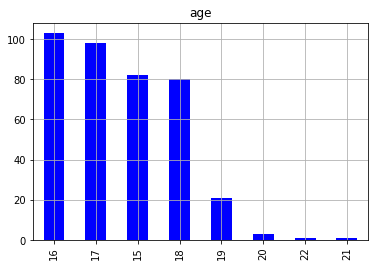

In [10]:
get_allocation('age')

В признаке нет пропусков и аномальных распределений. Возраст большей части учеников находится в диапазоне от 15 до 18 лет, у небольшого количества он превышен. Это не противоречит здравому смыслу, поскольку ученик мог пропусить год учебы по разным причинам и затем восстановиться. Данный столбец не нуждается в дальнейшей обработке.

##### failures

count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Процент пропусков составляет 0.06


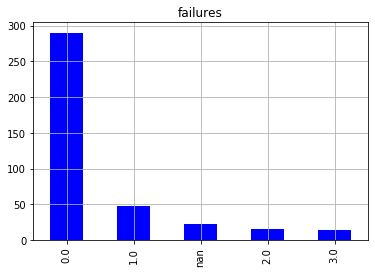

In [11]:
get_allocation('failures')

Согласно описанию, количество внеучебных неудач обозначается конкретным числом только в случае, если оно попадает в диапазон от 1 до 3 включительно. Таким образом, данные о внеучебных неудачах недостаточно конкретизированы и, учитывая небольшое количество пропусков, они могут быть заполнены константой 0.

In [12]:
df.failures.fillna(value=0, inplace=True)

##### studytime_granular

count    382.000000
mean      -6.109948
std        2.541716
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64
Процент пропусков составляет 0.02


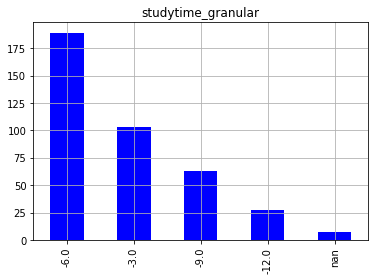

In [13]:
get_allocation('studytime_granular')

Процент пропусков невелик, поэтому его можно заполнить наиболее часто встречающимся значением.

In [14]:
df.studytime_granular.fillna(value=-6, inplace=True)

##### absences

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
Процент пропусков составляет 0.03


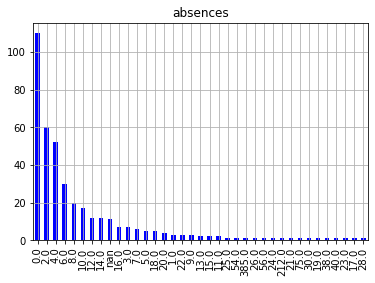

In [15]:
get_allocation('absences')

In [16]:
df.absences.value_counts(dropna = False)

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
NaN       11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Количество пропущенных занятий не содержит аномальных данных. Вместе с тем, это число сильно смещено в сторону нуля. Большая часть учеников из тех, кто хоть когда-нибудь отсутствовал на занятиях, пропустила не больше 2. В этих условиях целесообразно 6 % пропусков заполнить минимальным количеством пропущенных занятий.

In [17]:
df.absences.fillna(value=0, inplace=True)

#### Корреляция количественных признаков

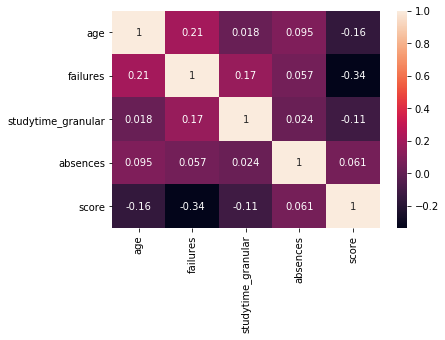

In [18]:
#Датасет с целевой переменной и числовыми признаками
numeral_df = df[['age', 'failures', 'studytime_granular', 'absences', 'score']]

#Тепловая карта корреляции
sns.heatmap(numeral_df.corr(), annot = True)

Наибольшая положительная корреляция обнаружена между признаками AGE и FAILURES. Однако она не превышает 0.2, поэтому ни один количественных признаков из датасета исключить нельзя.

### Визуализация и анализ нечисловых признаков

#### Функция для визуализации и сравнения нечисловых признаков

In [19]:
def comparison(column):
    fig, ax = plt.subplots(1,2, figsize= (12, 4))
    sns.countplot(df[column], ax=ax[0])
    sns.boxplot(x=column, y='score', data=df, ax=ax[1])
    fig.show()

### Бинарные признаки

#### school

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


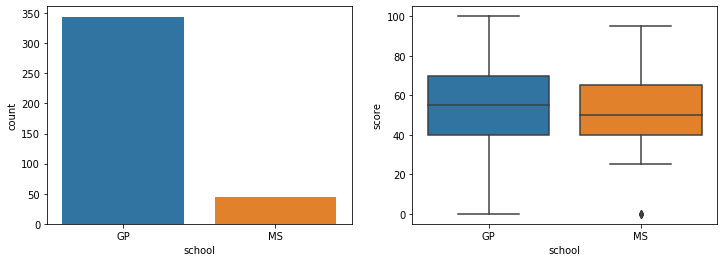

In [20]:
comparison('school')

Большинство учащихся посещают школы типа GP, распределение оценок в школах двух типов сопоставимое, поэтому этот признак можно удалить.

##### sex

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


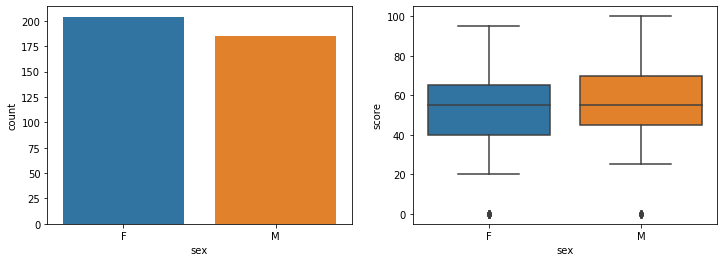

In [21]:
comparison('sex')

Число учащихся женского и мужского пола примерно равно, при этом оценки учеников мужского пола несколько выше. Поэтому оставим этот признак.

##### address

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


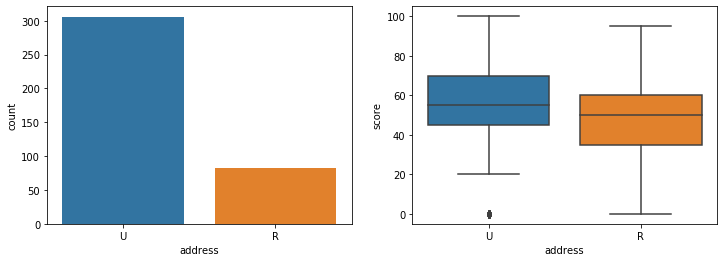

In [22]:
comparison('address')

Подавляющее количество учащихся живут в U (возможно, URBAN - городская местность). При этом оценки учебников с разным проживанием различаются, оставляем этот признак.

##### famsize

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


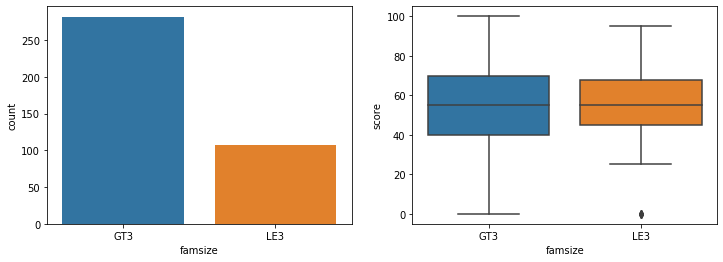

In [23]:
comparison('famsize')

В подавлящем количестве семей больше, чем 3 человека, что влечет за собой больший размах оценок. Боксплот показывает примерно одинаковое распределение оценок между этими двумя категориями, поэтому данный признак можно удалить.

##### Pstatus

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


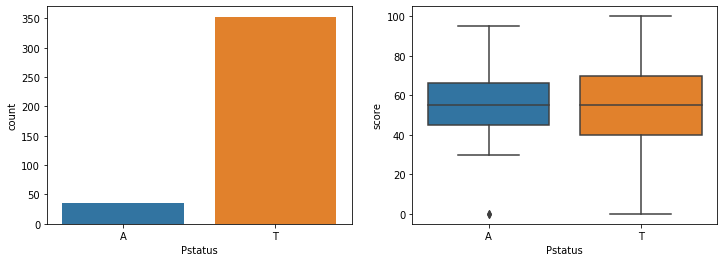

In [24]:
comparison('Pstatus')

У подавляющего большинства учащихся родители живут вместе, это также влечет больший размах оценок. Разница в межквартильном размахе невелика, поэтому этот признак также можно удалить.

##### schoolsup

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


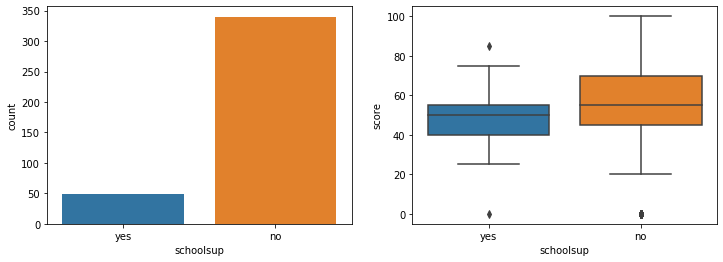

In [25]:
comparison('schoolsup')

Большинство учащихся не получало дополнительной школьной поддержки, при этом их оценки выше. Это значимый критерий. 

###### famsup

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


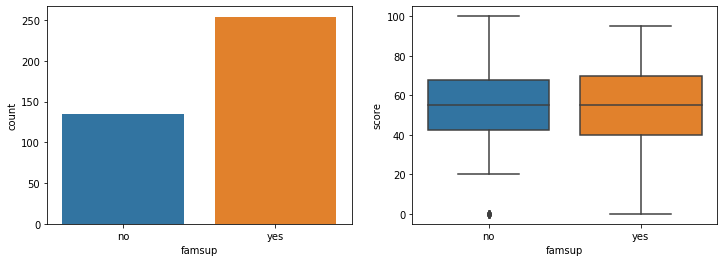

In [26]:
comparison('famsup')

Те, кто не получал дополнительной помощи в семье, получали более высокие оценки (возможно, они сами справлялись с программой). Межквартильный размах невелик в обеих группах, поэтому этот признак можно удалить.

#### paid

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


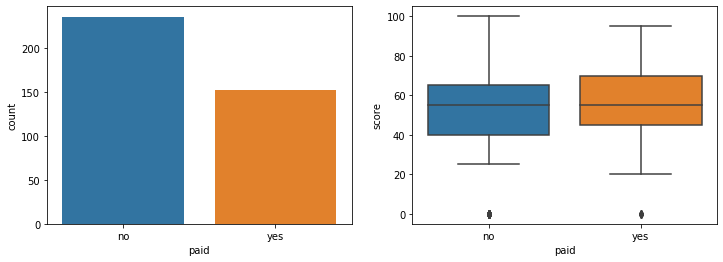

In [27]:
comparison('paid')

Те, кто не посещал платные курсы, в среднем учились также, как и те, кто их посещал. Удаляем этот признак.

##### activities

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


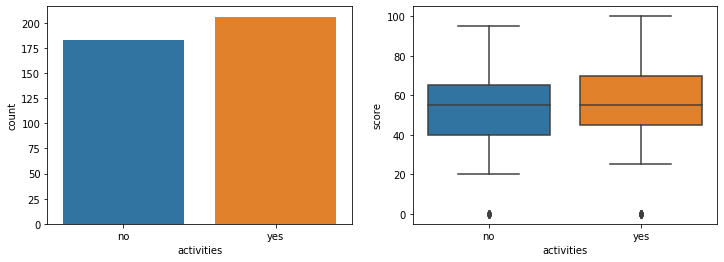

In [28]:
comparison('activities')

Признак распределен почти поровну между учащихся, различия в оценках невелики, поэтому его удаляем.

##### nursery

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


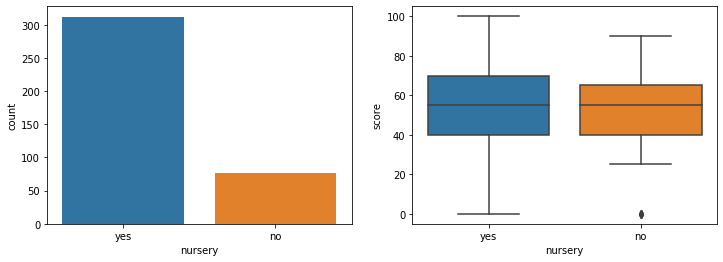

In [29]:
comparison('nursery')

Подавляющее большинство учащихся посещали детский сад, что влечет за собой больший размах в данных, а межквартильный размах сравним с теми, кто дошкольных учреждений не посещал. Поэтому этот признак можно удалить.

##### higher

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


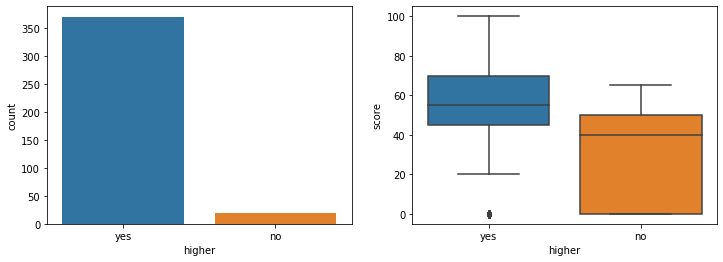

In [30]:
comparison('higher')

Подавляющее большинство учащихся планирует поступать в высшее учебное заведение. Это делает данный признак статистически малозначимым, поэтому, не смотря на большие различия в оценках учащихся разных групп, этот признак можно удалить.

##### internet

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


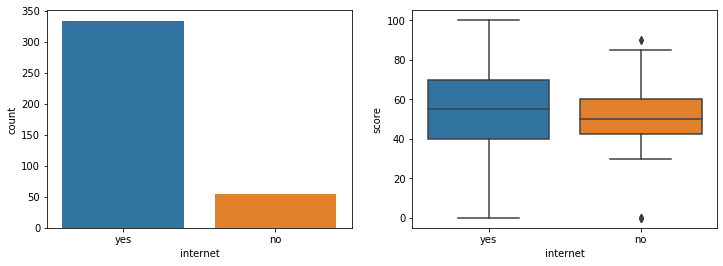

In [31]:
comparison('internet')

Также у большинства учащихся есть интернет, что влечет за собой больший размах в данных, однако медиана несколько выше, чем во второй группе, поэтому данный признак мы оставляем.

##### romantic

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


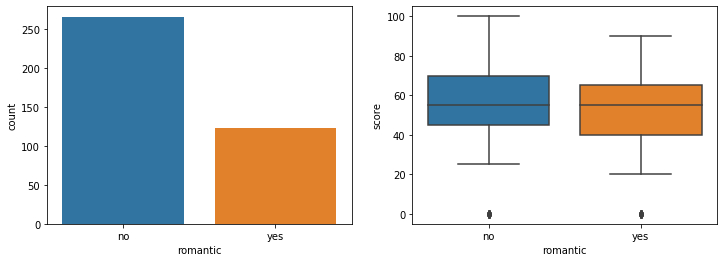

In [32]:
comparison('romantic')

Большинство учеников не влюблены и их оценки чуть выше, однако медианы в двух группах практически одинаковые, поэтому этот признак мы также удаляем. 

### Ординальные признаки

##### Medu

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


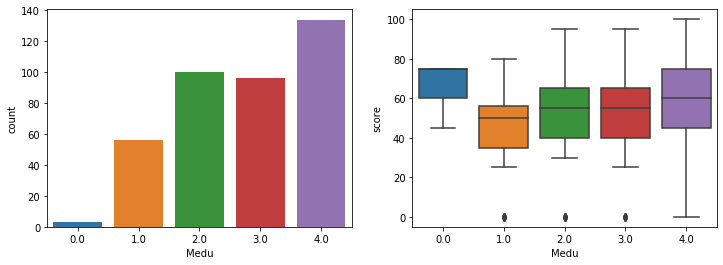

In [33]:
comparison('Medu')

Большинство матерей имеет высшее образование. Видна также связь между уровнем образования матери и оценками ученика, особенно в случае, если мать закончила только начальную школу (1-4 класса). Оставляем этот признак.

#### Fedu

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


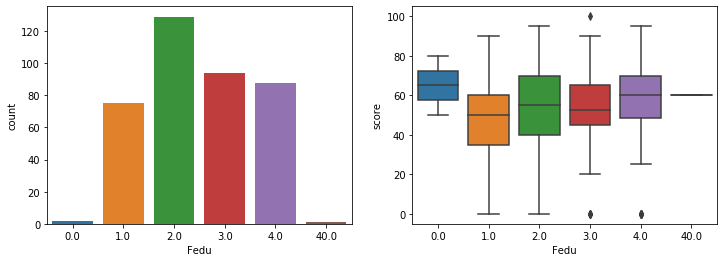

In [34]:
comparison('Fedu')

В этих данных имеется выброс - значение 40. Предположительно - это ошибка, заменим его на 4.

In [35]:
df.Fedu.replace(40,4, inplace = True)

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


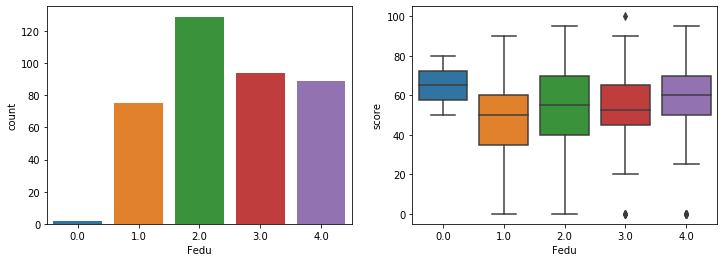

In [36]:
comparison('Fedu')

Подавляющее большинство отцов имеет уровень образования 2, поэтому именно в этой группе мы видим максимальный размах и межквартильный размах. Нельзя сказать, что оценки учеников зависят от уровня образования отцов, поэтому данный признак мы удалим.

##### traveltime

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


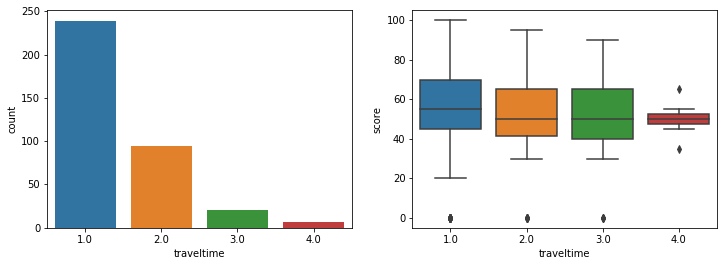

In [37]:
comparison('traveltime')

Подавляющее большинство учеников добирается до школы меньше 15 минут, медианный уровень оценки примерно одинаковый во всех группах. В первой он чуть больше остальных за счет того, что выборка больше. Таким образом, этот признак нельзя считать значимым, удаляем его.

##### studytime

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


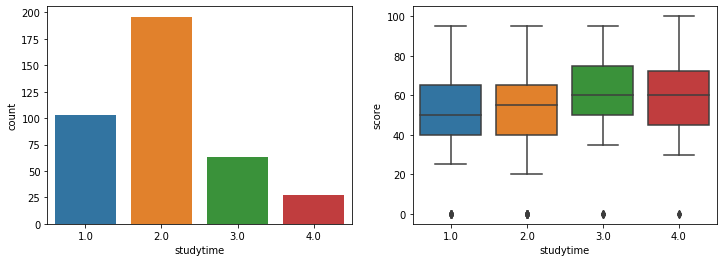

In [38]:
comparison('studytime')

У тех, кто тратит больше времени на учебу, медианная оценка выше, поэтому данный признак оставляем.

##### famrel

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


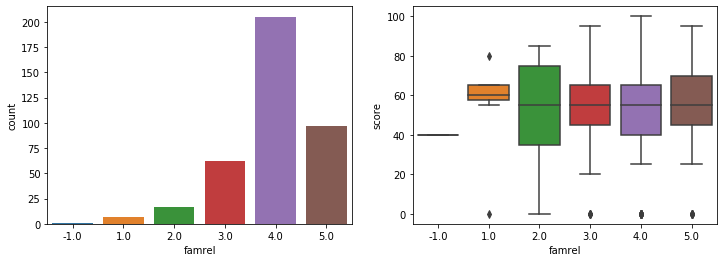

In [39]:
comparison('famrel')

Видны выбросы - оценка -1. Предположим, что это - ошибка и заменим ее на 1.

In [40]:
df.famrel.replace(-1,1, inplace = True)

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


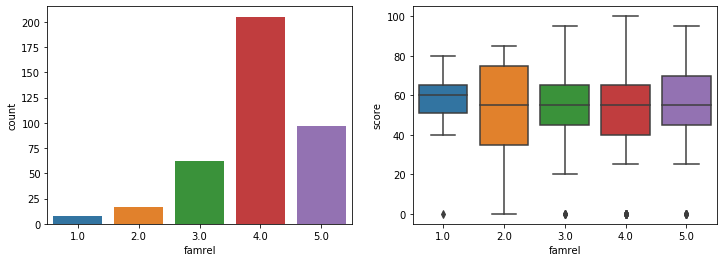

In [41]:
comparison('famrel')

Медианная оценка одинаковая в большинстве групп, в первой - отличные от остальных данные в силу малочисленности выборки. Удаляем этот признак.

##### freetime

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


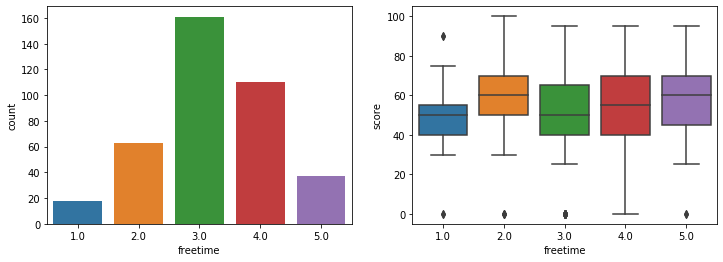

In [42]:
comparison('freetime')

Медианная оценка существенно выше у тех учеников, у которых есть небольшое количество свободного времени. Оставляем этот признак.

##### goout

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


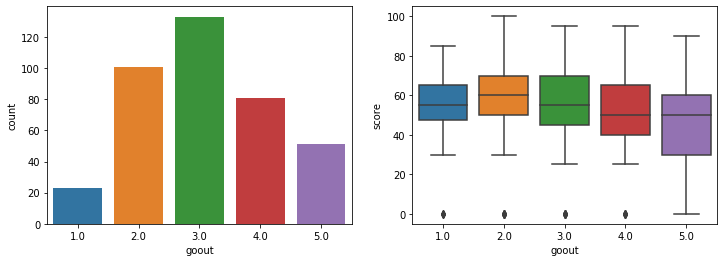

In [43]:
comparison('goout')

Этот признак сильно коррелирует с FREETIME, поэтому его можно удалить.

##### health

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


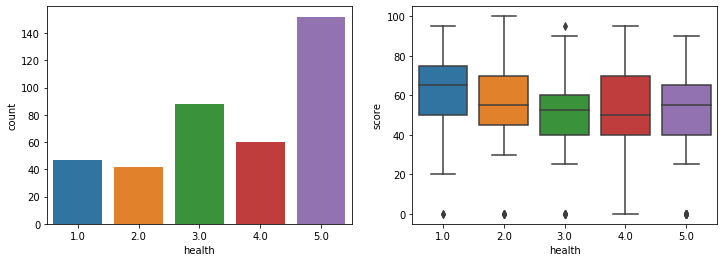

In [44]:
comparison('health')

Уровни максимальной оценки и медианной значительно разнятся для учеников с разным состоянием здоровья, поэтому этот признак нужно оставить.

### Номинальные признаки

У отцов и матерей одинаковое наименование видов занятости. Посмотрим, насколько скоррелированы эти признаки.

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


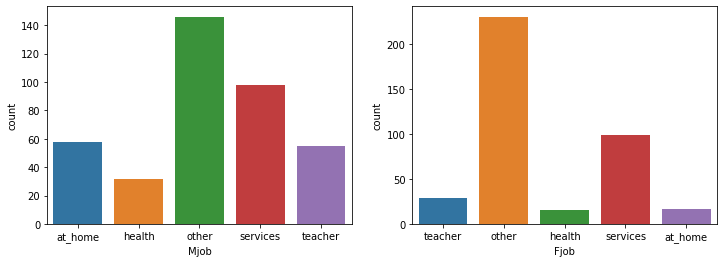

In [45]:
fig, ax = plt.subplots(1,2, figsize= (12, 4))
sns.countplot(df['Mjob'], ax=ax[0])
sns.countplot(df['Fjob'], ax=ax[1])
fig.show()

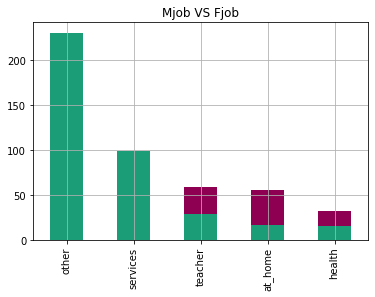

In [46]:
df['Mjob'].value_counts(dropna = False).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'PiYG', 
                              title = 'Mjob VS Fjob')

df['Fjob'].value_counts(dropna = False).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'Dark2', 
                              title = 'Mjob VS Fjob')

Видна сильная корреляция между распределением профессий среди обоих полов родителей (большинство работает либо в сфере сервиса, либо в иных профессиях). Закономерно, что матери больше заняты в так называемых "женских" профессиях - учителя, врачи, домохозяйки. Из этих признаков нужно оставить один, это будут профессии матерей, тем более, что учителей и домохозяек, которые могут заниматься с детьми дома, больше.

#### Mjob, reason, guardian

In [47]:
%matplotlib inline

C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
C:\Users\Nataly\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


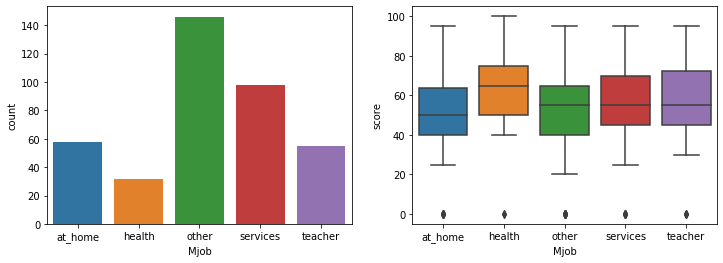

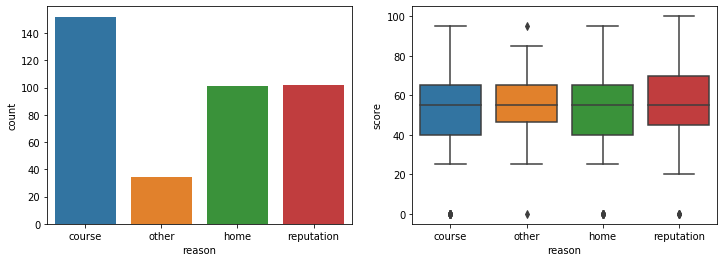

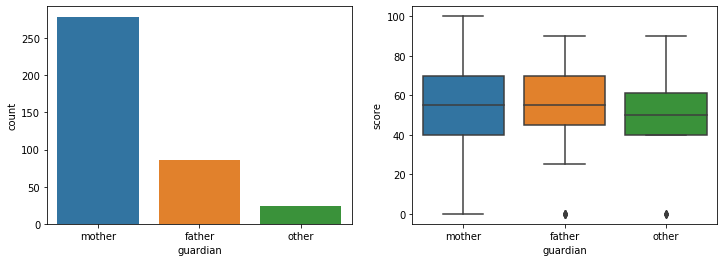

In [48]:
def comparison(column):
    fig, ax = plt.subplots(1,2, figsize= (12, 4))
    sns.countplot(df[column], ax=ax[0])
    sns.boxplot(x=column, y='score', data=df, ax=ax[1])
    fig.show()
    
for col in ['Mjob', 'reason', 'guardian']:
    comparison(col)


Видимое отличие в оценках наблюдается только у учеников, чьи матери заняты в сфере здравоохранения (возможно, в силу высокого образовательного ценза в этой профессии). Можно оставить только признак MJOB, все остальные - удалить.

### Список признаков для удаления

In [49]:
drop_columns = ['school', 'higher', 'famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery', 
                'romantic', 'Fedu', 'traveltime', 'famrel', 'goout', 'Fjob', 'reason', 'guardian']

### Очищенный датафрейм

In [50]:
df_clean = df.drop(drop_columns, axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 389 non-null    object 
 1   age                 389 non-null    int64  
 2   address             389 non-null    object 
 3   Medu                389 non-null    float64
 4   Mjob                389 non-null    object 
 5   studytime           389 non-null    float64
 6   failures            389 non-null    float64
 7   schoolsup           389 non-null    object 
 8   studytime_granular  389 non-null    float64
 9   internet            389 non-null    object 
 10  freetime            389 non-null    float64
 11  health              389 non-null    float64
 12  absences            389 non-null    float64
 13  score               389 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 55.6+ KB


### Вывод

В исходном датафрейме были обнаружены пропуски данных и выбросы. В целевой переменной пропуски данных были удалены, а в оставшихся признаках - заполнены согласно их значению и распределению.


Основной метод анализа признаков - визуальное сопоставление распределения и корреляции с целевой переменной.

В датасете были представлены следующие виды признаков: числовые, бинарные, номинальные, ординальные. Не смотря на то, что в части бинарных признаков наблюдалось значительное смещение в сторону одного из них,
    многие из них оказались значимыми и были оставлены в финальном датасете. Числовые признаки были мало скоррелированы между собой, поэтому все оставлены в финальном датасете.

Всего из 28 признаков осталось 12, что значительно сократило исходный датафрейм.